In [149]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
df = pd.read_csv('co2-ppm-daily.csv')
df

date   value
0      1958-03-30  316.16
1      1958-03-31  316.40
2      1958-04-02  317.67
3      1958-04-03  317.76
4      1958-04-04  317.09
...           ...     ...
18759  2017-12-27  406.88
18760  2017-12-28  408.26
18761  2017-12-29  407.53
18762  2017-12-30  407.30
18763  2017-12-31  407.01

[18764 rows x 2 columns]

Импортируем необходимые библиотеки, а также выводим наш фрейм данных

In [150]:
df["date"] = pd.to_datetime(df["date"])

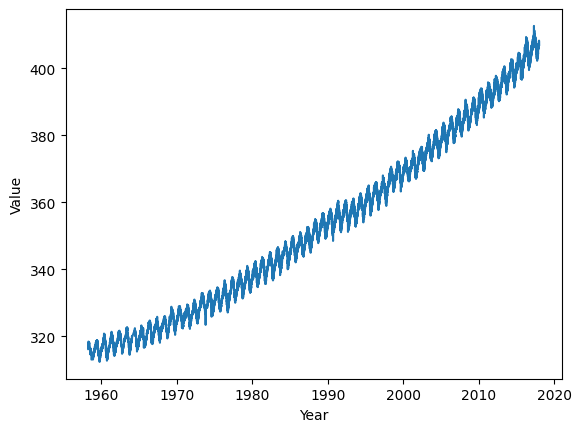

In [151]:
x = df.date
y = df.value
plt.plot(x,y)
plt.xlabel("Year")
plt.ylabel("Value")
plt.show()

fig = px.line(df, x="date", y="value")
fig.show()

Приведем столбец date к datetime, на оси х отметим года, на оси у - значения и построим график с подписями осей. Как можно видеть на графике, значеия постепенно росли с каждым годом.

In [152]:
from prophet import Prophet
df = df.rename(columns={"date":"ds", "value": "y"})
df

ds       y
0     1958-03-30  316.16
1     1958-03-31  316.40
2     1958-04-02  317.67
3     1958-04-03  317.76
4     1958-04-04  317.09
...          ...     ...
18759 2017-12-27  406.88
18760 2017-12-28  408.26
18761 2017-12-29  407.53
18762 2017-12-30  407.30
18763 2017-12-31  407.01

[18764 rows x 2 columns]

Импортируем библиотеку prophet для создания прогноза на 2 года. Prophet требует, чтобы столбцы входных данных и метрик назывались ds и у соответственно, поэтому также переименовываем наши столбцы соответствующим образом.

In [153]:
model = Prophet()
model.fit(df)

15:06:00 - cmdstanpy - INFO - Chain [1] start processing
15:06:19 - cmdstanpy - INFO - Chain [1] done processing


Создаем объект Prophet 

In [154]:
futDate = model.make_future_dataframe(periods= 2, freq="YS")
forecast = model.predict(futDate)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

ds        yhat  yhat_lower  yhat_upper
0     1958-03-30  316.860703  316.003137  317.716044
1     1958-03-31  316.891599  316.070491  317.758156
2     1958-04-02  316.997161  316.208023  317.787344
3     1958-04-03  317.043564  316.250541  317.947301
4     1958-04-04  317.090661  316.246883  317.963295
...          ...         ...         ...         ...
18761 2017-12-29  406.427310  405.572145  407.231693
18762 2017-12-30  406.454569  405.645465  407.327194
18763 2017-12-31  406.498959  405.721359  407.307827
18764 2018-01-01  406.519133  405.623215  407.365714
18765 2019-01-01  408.761144  407.682709  409.948318

[18766 rows x 4 columns]

Для получения прогноза передаем новый датафрейм, указываем количество новых элементов, в нашем фрейме, а также обязательно указываем частоту временных рядов в виде "YS", то есть новый элемент будет создаваться с частотой раз в год. Далее передаем наш датафрейм в метод predict, который вернет нам новый фрейм данных. В столбце yhat мы получаем прогнозируемое значение метрики, а в стобца lower upper  нижние и верхние границы прогнозов соответственно

C:\Users\musin\PycharmProjects\MAI_BIGDATA_TimeSeries\venv\Lib\site-packages\prophet\plot.py:72: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

C:\Users\musin\PycharmProjects\MAI_BIGDATA_TimeSeries\venv\Lib\site-packages\prophet\plot.py:73: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



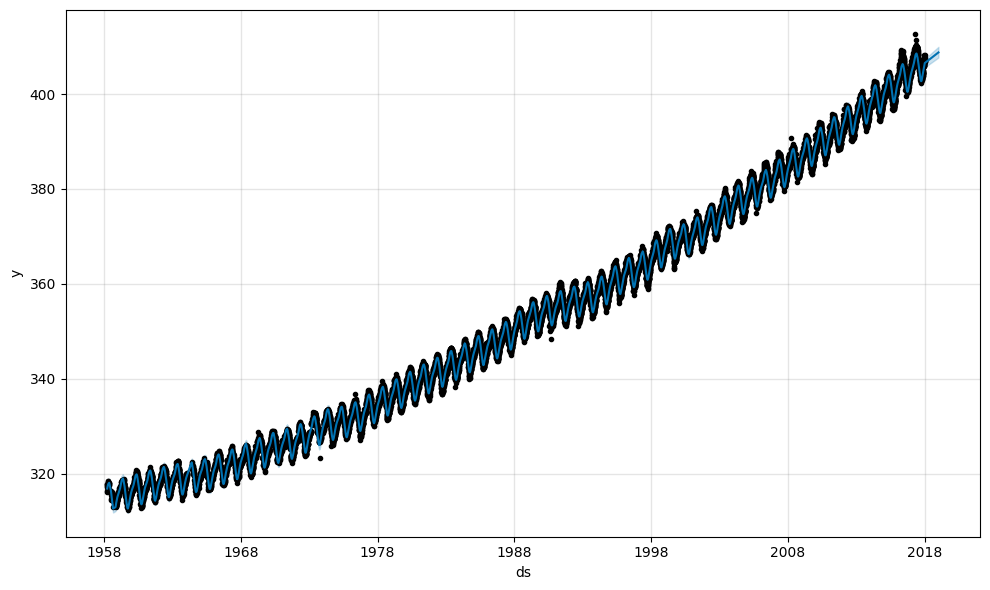

In [155]:
from prophet.plot import plot_plotly

fig = model.plot(forecast)
plot_plotly(model, forecast)

Построим графики нового датафрейма с помощью matplotlib и plotly 

In [156]:
df["day"] = df.ds.dt.day.astype(float)
df["month"] = df.ds.dt.month.astype(float)
df["year"] = df.ds.dt.year.astype(float)
df1 = df[["day", "month", "year", "y"]].astype(float)
df1

day  month    year       y
0      30.0    3.0  1958.0  316.16
1      31.0    3.0  1958.0  316.40
2       2.0    4.0  1958.0  317.67
3       3.0    4.0  1958.0  317.76
4       4.0    4.0  1958.0  317.09
...     ...    ...     ...     ...
18759  27.0   12.0  2017.0  406.88
18760  28.0   12.0  2017.0  408.26
18761  29.0   12.0  2017.0  407.53
18762  30.0   12.0  2017.0  407.30
18763  31.0   12.0  2017.0  407.01

[18764 rows x 4 columns]

Создадим новый датафрейм для прогнозов на 2 года с помощью методов линейной регрессии и случайного леса


In [157]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, OrdinalEncoder

In [158]:
encoder = OrdinalEncoder()
encoder.fit(df1)
df1 = pd.DataFrame(encoder.fit_transform(df1), columns=df1.columns)
X = df1.to_numpy()[:, (1,2,3)]
Y = df1['y'].astype(float)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state= 75786786)

In [159]:
scaler = StandardScaler()
scaler.fit(X)

StandardScaler()

Проводим выборку

In [160]:
forest = RandomForestClassifier(max_depth=10, n_estimators=100)
forest.fit(X_train, Y_train)

RandomForestClassifier(max_depth=10)

In [172]:
predTest1 = forest.predict(X_test)
yForest = predTest1[:2]

In [162]:
linear = LinearRegression()
linear.fit(X_train, Y_train)

LinearRegression()

In [175]:
predTest2 = linear.predict(X_test)
yLinear = predTest2[:2]

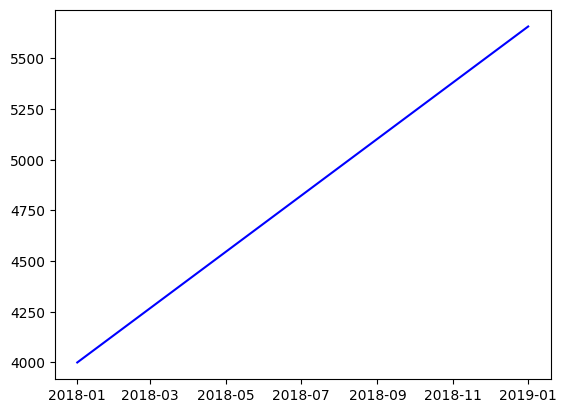

In [173]:
predDate = pd.date_range(start=df['ds'].max(), periods=2, freq="YS")
plt.plot(predDate, yForest, label='Случайный лес', color="blue")

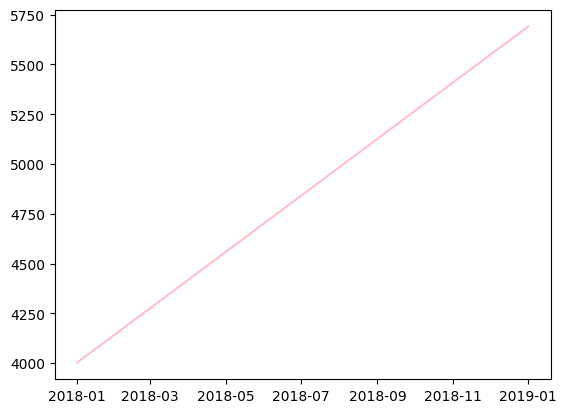

In [176]:
plt.plot(predDate, yLinear,label="Линейная регрессия", color="pink")

В предыдущих блоках кода мы создали прогнозы выброса СО2 на 2 ближайших года с использованием методов случайного леса и линейной регрессии. Также были построены графики эти прогнозов, и в виду малого периода времени, он выглядит как прямая, которая постоянно растет, однако если брать бОльший период времени, ты мы сможем увидеть и взлеты и падения значений